In [20]:
import pandas as pd

In [21]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [22]:
data = pd.read_csv("result-full.csv", index_col=0, header=[0, 1])

In [23]:
data.head()

DE Current   ROI   Revenue                           EPS  \
     D/E ratio Current  Mean  10Y CAGR   5Y CAGR   1Y CAGR  10Y CAGR   
AAPL      True    True  True  0.197500  0.073149 -0.020411  0.249570   
MSFT      True    True  True  0.079727  0.077033  0.140295  0.120633   
AMZN      True    True  True  0.276040  0.258135  0.204541  0.274174   
GOOG      True    True  True  0.212071  0.196510  0.183001  0.170196   
FB        True    True  True  0.569994  0.414929  0.266109  0.516426   

                              BVPS                           FCF            \
       5Y CAGR   1Y CAGR  10Y CAGR   5Y CAGR   1Y CAGR  10Y CAGR   5Y CAGR   
AAPL  0.130280 -0.003356  0.075461 -0.063686 -0.243615  0.206457  0.032706   
MSFT  0.139827  1.375587  0.115237  0.109523  0.174226  0.091656  0.072066   
AMZN       NaN  0.142502  0.277432  0.441417  0.444376  0.243557  0.676663   
GOOG  0.190352  0.124943       NaN  0.131984  0.113328  0.137953  0.207503   
FB    0.423520 -0.150594       NaN  0.229220  0.254098  0.675028  0.310155   

                
       1Y CAGR  
AAPL -0.081487  
MSFT  0.186283  
AMZN  0.331186  
GOOG  0.356517  
FB    0.381079

In [24]:
# to make the legend nicer
plt.rcParams.update({'font.size': 3})

In [25]:
# start index when start, if nothing given at 0. number of rows and columns is 3
def plot(df, start = 0, nrows=3, ncols = 3):
    # 3 by 3 rows and columns
    fig, ax = plt.subplots(nrows, ncols)
    # for loop to index into axes, index into dataframe and axes. 
    for i in range(nrows):
        for j in range(ncols):
            # position of dataframe
            pos = start + j + i*ncols
            # take hard copy of frame, if modify frame and take view, would have big mess
            frame = df.iloc[pos][3:].copy()
            # create name before unstack
            name = frame.name
            frame = frame.unstack(1)
            frame.plot.bar(ax = ax[i,j])
            # set the name
            ax[i,j].set_title(name)
            # look for values above a line that is transparent, which is the 0.1 value
            ax[i,j].axhline(0.1, color= 'r', alpha = 0.3)

<IPython.core.display.Javascript object>


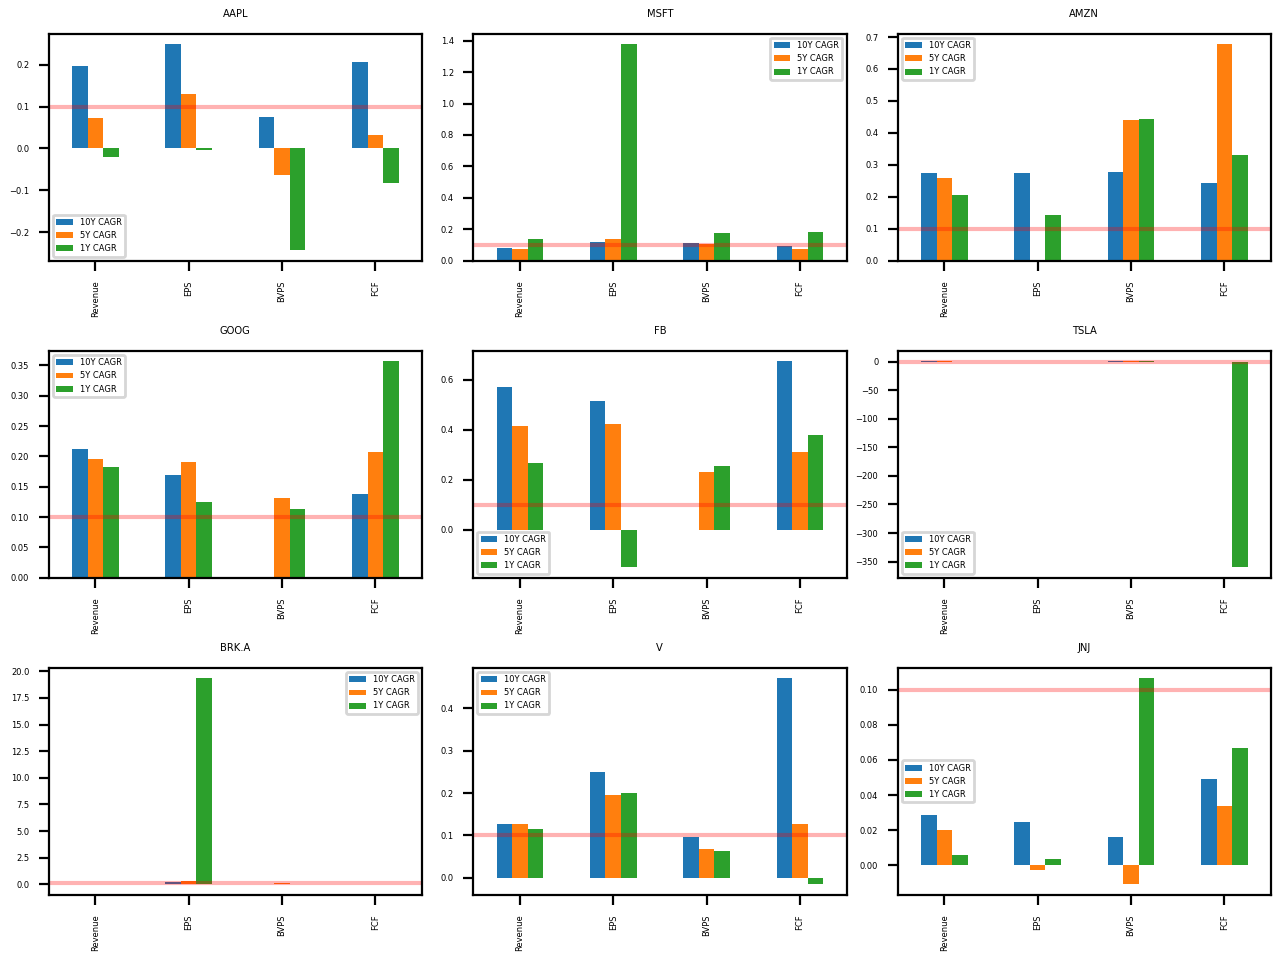

In [26]:
plot(data)
# creates more space
plt.tight_layout()

<IPython.core.display.Javascript object>


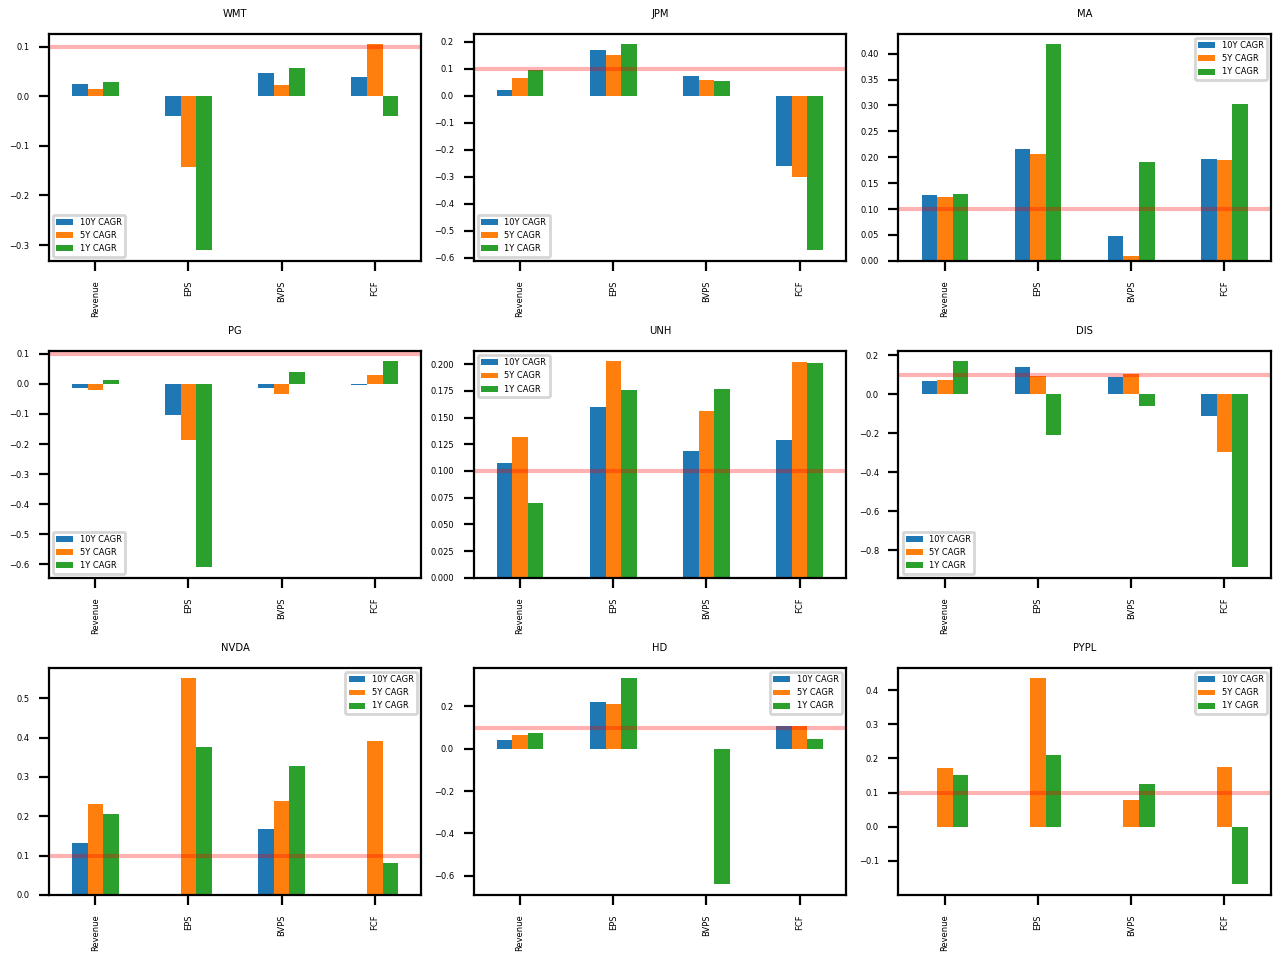

In [27]:
# not Apple, first and to ensure the graphs aren't on top of each other(more space)
plot(data, start = 9)
plt.tight_layout()

<IPython.core.display.Javascript object>


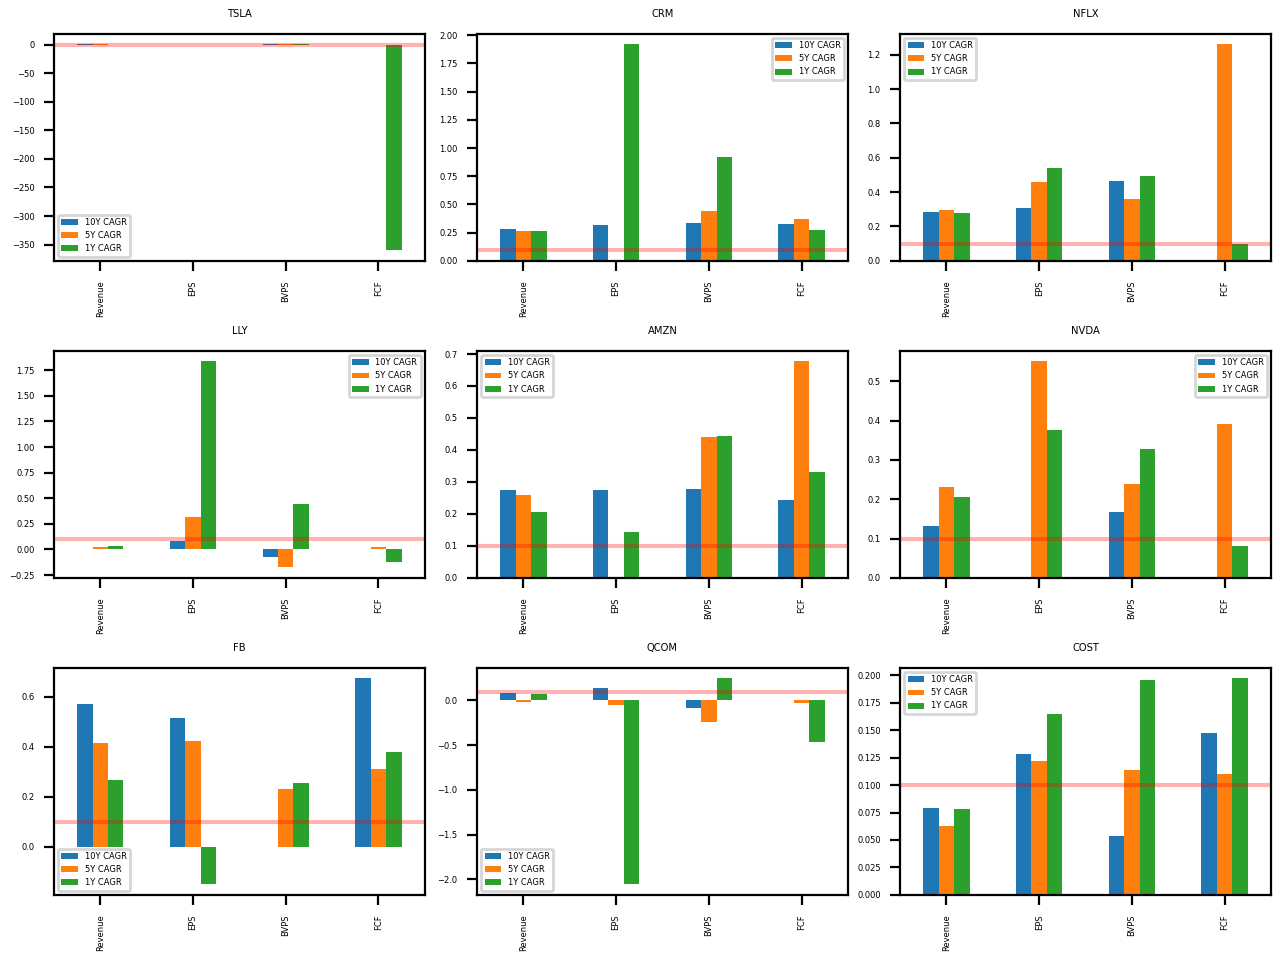

In [30]:
# Puts Tesla in front by sorting values by 1Y CAGR
plot(data.sort_values(('BVPS', '1Y CAGR'), ascending = False))
plt.tight_layout()